In [1]:
pip install folium

     -------------------------------------- 102.3/102.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import folium package
import folium
 
# Map method of folium return Map object
 
# Here we pass coordinates of Gfg
# and starting Zoom level = 12
my_map1 = folium.Map(location = [28.5011226, 77.4099794],
                                        zoom_start = 12 )
 
# save method of Map object will create a map
my_map1.save(" my_map1.html " )

New one

In [3]:
import folium
m=folium.Map(location=[28.644800, 77.216721])
m

In [5]:
from branca.element import Figure
fig=Figure(width=550,height=350)
m

In [6]:
m1=folium.Map(width=550,height=350,location=[28.644800, 77.216721],zoom_start=11,min_zoom=8,max_zoom=14)
fig.add_child(m1)
m1

In [7]:
fig2=Figure(width=550,height=350)
m2=folium.Map(location=[28.644800, 77.216721])
fig2.add_child(m2)
folium.TileLayer('Stamen Terrain').add_to(m2)
folium.TileLayer('Stamen Toner').add_to(m2)
folium.TileLayer('Stamen Water Color').add_to(m2)
folium.TileLayer('cartodbpositron').add_to(m2)
folium.TileLayer('cartodbdark_matter').add_to(m2)
folium.LayerControl().add_to(m2)
m2

In [10]:
# Creating Basemap
fig3=Figure(width=550,height=350)
m3=folium.Map(location=[28.644800, 77.216721],tiles='cartodbdark_matter',zoom_start=11)
fig3.add_child(m3)

#Adding markers to the map
folium.Marker(location=[28.695800, 77.244721],popup='Default popup Marker1',tooltip='Click here to see Popup').add_to(m3)
folium.Marker(location=[28.645800, 77.214721],popup='<strong>Marker3</strong>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)
folium.Marker(location=[28.655800, 77.274721],popup='<h3 style="color:green;">Marker2</h3>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)

m3
m3.save(" my_map3.html " )

Lets do the heatmap tutorial

In [12]:
pip install geopandas


     ---------------------------------------- 1.1/1.1 MB 8.7 MB/s eta 0:00:00
     --------------------------------------- 22.7/22.7 MB 10.1 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 11.1 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import numpy as np
import pandas as pd

# For plotting maps
import folium

# For Regular Expressions
import re

# For working with geographical data
import geopandas

# For plotting in python
import matplotlib
import matplotlib.pyplot as plt

In [14]:
df_covid=pd.read_csv('complete.csv')
df_covid.head()

Date Name of State / UT  Latitude  Longitude  Total Confirmed cases  \
0  2020-01-30             Kerala   10.8505    76.2711                    1.0   
1  2020-01-31             Kerala   10.8505    76.2711                    1.0   
2  2020-02-01             Kerala   10.8505    76.2711                    2.0   
3  2020-02-02             Kerala   10.8505    76.2711                    3.0   
4  2020-02-03             Kerala   10.8505    76.2711                    3.0   

  Death  Cured/Discharged/Migrated  New cases  New deaths  New recovered  
0     0                        0.0          0           0              0  
1     0                        0.0          0           0              0  
2     0                        0.0          1           0              0  
3     0                        0.0          1           0              0  
4     0                        0.0          0           0              0

In [16]:
india_geojson=geopandas.read_file('india.json')
india_geojson.head()

id   district dt_code    st_nm st_code    year  \
0 NaN     Aizawl     261  Mizoram      15  2011_c   
1 NaN   Champhai     262  Mizoram      15  2011_c   
2 NaN    Kolasib     263  Mizoram      15  2011_c   
3 NaN  Lawngtlai     264  Mizoram      15  2011_c   
4 NaN    Lunglei     265  Mizoram      15  2011_c   

                                            geometry  
0  POLYGON ((93.04466 23.41052, 92.94680 23.51363...  
1  MULTIPOLYGON (((93.04619 23.66623, 93.04466 23...  
2  POLYGON ((92.89633 24.39072, 92.86116 24.31374...  
3  POLYGON ((92.93456 22.55405, 92.93150 22.39458...  
4  POLYGON ((92.67307 23.38303, 92.68989 23.32804...

<AxesSubplot:>

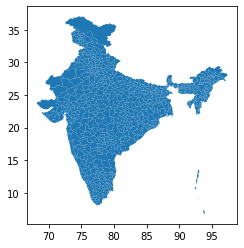

In [17]:
india_geojson.plot()

possible issues, check date later for the MMU code

In [18]:
df_covid['Date']=pd.to_datetime(df_covid['Date']).apply(lambda x: x - pd.DateOffset(days=1))


In [19]:
df_covid['Name of State / UT'].unique()


array(['Kerala', 'Delhi', 'Telengana', 'Haryana', 'Rajasthan',
       'Uttar Pradesh', 'Tamil Nadu', 'Union Territory of Ladakh',
       'Karnataka', 'Maharashtra', 'Punjab',
       'Union Territory of Jammu and Kashmir', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Union Territory of Chandigarh', 'Gujarat',
       'Chandigarh', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim', 'Nagaland',
       'Telangana', 'Telangana***'], dtype=object)

In [20]:
df_covid['Name of State / UT']=df_covid['Name of State / UT'].apply(lambda x: re.sub('Union Territory of ','',x))
df_covid['Name of State / UT'].replace('Telengana','Telangana',inplace=True)
df_covid['Name of State / UT'].replace('Dadar Nagar Haveli','Dadra and Nagar Haveli',inplace=True)

In [21]:
id_dict={'Andaman and Nicobar Islands': '0',
 'Arunachal Pradesh': '1',
 'Assam': '2',
 'Bihar': '3',
 'Chandigarh': '4',
 'Chhattisgarh': '5',
 'Dadra and Nagar Haveli': '6',
 'Daman and Diu': '7',
 'Goa': '8',
 'Gujarat': '9',
 'Haryana': '10',
 'Himachal Pradesh': '11',
 'Jharkhand': '12',
 'Karnataka': '13',
 'Kerala': '14',
 'Lakshadweep': '15',
 'Madhya Pradesh': '16',
 'Maharashtra': '17',
 'Manipur': '18',
 'Meghalaya': '19',
 'Mizoram': '20',
 'Nagaland': '21',
 'Delhi': '22',
 'Puducherry': '23',
 'Punjab': '24',
 'Rajasthan': '25',
 'Sikkim': '26',
 'Tamil Nadu': '27',
 'Telangana': '28',
 'Tripura': '29',
 'Uttar Pradesh': '30',
 'Uttarakhand': '31',
 'West Bengal': '32',
 'Odisha': '33',
 'Andhra Pradesh': '34',
 'Jammu and Kashmir': '35',
 'Ladakh': '36'}
 
# Creating IDs using the above dictionary
df_covid['state_id']=df_covid['Name of State / UT'].map(id_dict)

In [23]:

# df_covid['Active Cases']=df_covid['Total Confirmed cases']-(df_covid['Cured/Discharged/Migrated']+df_covid['Death'])
# df_covid.head()

# Convert 'Cured/Discharged/Migrated' and 'Death' columns to numeric
df_covid['Cured/Discharged/Migrated'] = pd.to_numeric(df_covid['Cured/Discharged/Migrated'], errors='coerce')
df_covid['Death'] = pd.to_numeric(df_covid['Death'], errors='coerce')

# Replace missing or NaN values with 0
df_covid['Cured/Discharged/Migrated'].fillna(0, inplace=True)
df_covid['Death'].fillna(0, inplace=True)

# Calculate 'Active Cases' column
df_covid['Active Cases'] = df_covid['Total Confirmed cases'] - (df_covid['Cured/Discharged/Migrated'] + df_covid['Death'])

# Print the first few rows of the DataFrame
print(df_covid.head())


        Date Name of State / UT  Latitude  Longitude  Total Confirmed cases  \
0 2020-01-29             Kerala   10.8505    76.2711                    1.0   
1 2020-01-30             Kerala   10.8505    76.2711                    1.0   
2 2020-01-31             Kerala   10.8505    76.2711                    2.0   
3 2020-02-01             Kerala   10.8505    76.2711                    3.0   
4 2020-02-02             Kerala   10.8505    76.2711                    3.0   

   Death  Cured/Discharged/Migrated  New cases  New deaths  New recovered  \
0    0.0                        0.0          0           0              0   
1    0.0                        0.0          0           0              0   
2    0.0                        0.0          1           0              0   
3    0.0                        0.0          1           0              0   
4    0.0                        0.0          0           0              0   

  state_id  Active Cases  
0       14           1.0  
1       

In [24]:
bins=np.linspace(min(df_covid['Active Cases']),max(df_covid['Active Cases']),11)
bins

array([     0. ,  15096.6,  30193.2,  45289.8,  60386.4,  75483. ,
        90579.6, 105676.2, 120772.8, 135869.4, 150966. ])

In [25]:
# Coloring states and UTs with active COVID-19 cases
df_covid['color']=pd.cut(df_covid['Active Cases'],bins,labels=['#FFEBEB','#F8D2D4','#F2B9BE','#EBA1A8','#E58892','#DE6F7C','#D85766','#D13E50','#CB253A','#C50D24'],include_lowest=False)
# Coloring states and UTs with no active cases but previously had
df_covid['color'].replace(np.nan,'#32CD32',inplace=True)

In [26]:
df_covid=df_covid[['Date','state_id','color']]
df_covid.head()

Date state_id    color
0 2020-01-29       14  #FFEBEB
1 2020-01-30       14  #FFEBEB
2 2020-01-31       14  #FFEBEB
3 2020-02-01       14  #FFEBEB
4 2020-02-02       14  #FFEBEB

In [27]:
for date in df_covid['Date'].unique():
    diff=set([str(i) for i in range(37)])-set(df_covid[df_covid['Date']==date]['state_id'])
    for i in diff:
      df_covid=pd.concat([df_covid,pd.DataFrame([[date,'#0073CF',i]],columns=['Date','color','state_id'])],ignore_index=True)
df_covid.sort_values('Date',inplace=True)

In [29]:
# df_covid['Date']=(df_covid['Date'].astype(int)// 10**9).astype('U10')
# covid_dict={}
# for i in df_covid['state_id'].unique():
#     covid_dict[i]={}
#     for j in df_covid[df_covid['state_id']==i].set_index(['state_id']).values:   
#         covid_dict[i][j[0]]={'color':j[1],'opacity':0.7}

import pandas as pd

# Assuming you have a DataFrame df_covid with a 'Date' column in datetime format

# Convert 'Date' column to a string representation of date and time
df_covid['Date'] = df_covid['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Initialize an empty dictionary
covid_dict = {}

# Iterate over unique values in 'state_id'
for state_id in df_covid['state_id'].unique():
    covid_dict[state_id] = {}
    state_data = df_covid[df_covid['state_id'] == state_id]
    
    # Iterate over rows in the state_data DataFrame
    for index, row in state_data.iterrows():
        date_str = row['Date']
        color = row['color']
        opacity = 0.7
        
        # Add data to the dictionary
        covid_dict[state_id][date_str] = {'color': color, 'opacity': opacity}

# Now you have a dictionary containing the data
# where the keys are state IDs, and the values are dictionaries with date strings as keys
# and color and opacity as values


In [30]:
list(covid_dict.items())[10]

('36',
 {'2020-01-29 00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-01-30 00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-01-31 00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-02-01 00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-02-02 00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-02-03 00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-02-04 00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-02-05 00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-02-06 00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-02-07 00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-02-08 00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-02-09 00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-02-10 00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-02-11 00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-02-12 00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-02-13 00:00:00': {'color': '#0073CF', 'o

In [31]:
india_geojson['state_id']=india_geojson['st_nm'].map(id_dict)
india_geojson.drop(columns='st_nm',inplace=True)
india_geojson.head()

id   district dt_code st_code    year  \
0 NaN     Aizawl     261      15  2011_c   
1 NaN   Champhai     262      15  2011_c   
2 NaN    Kolasib     263      15  2011_c   
3 NaN  Lawngtlai     264      15  2011_c   
4 NaN    Lunglei     265      15  2011_c   

                                            geometry state_id  
0  POLYGON ((93.04466 23.41052, 92.94680 23.51363...       20  
1  MULTIPOLYGON (((93.04619 23.66623, 93.04466 23...       20  
2  POLYGON ((92.89633 24.39072, 92.86116 24.31374...       20  
3  POLYGON ((92.93456 22.55405, 92.93150 22.39458...       20  
4  POLYGON ((92.67307 23.38303, 92.68989 23.32804...       20

In [32]:
from folium.plugins import TimeSliderChoropleth


In [33]:
fig6=Figure(height=850,width=1000)
m6 = folium.Map([24, 84], tiles='cartodbpositron', zoom_start=5)
fig6.add_child(m6)

In [35]:
# g = TimeSliderChoropleth(
#     india_geojson.set_index('state_id').to_json(),
#     styledict=covid_dict
# ).add_to(m6)
# m6

# Assuming you have already created the covid_dict as shown in the previous code

# Convert the 'color' value to a string
for state_id, data_dict in covid_dict.items():
    for date_str, data in data_dict.items():
        data['color'] = str(data['color'])

# Now, create the TimeSliderChoropleth
g = TimeSliderChoropleth(
    india_geojson.set_index('state_id').to_json(),
    styledict=covid_dict
).add_to(m6)


In [38]:
# m6
# Convert all values in the 'styledict' to strings
for state_id, date_dict in covid_dict.items():
    for date_str, data in date_dict.items():
        data['color'] = str(data['color'])
        data['opacity'] = str(data['opacity'])

# Now 'covid_dict' contains all values as strings



In [39]:
m6

TypeError: '<' not supported between instances of 'float' and 'str'